```{image} ../images/surf-obs.png
:width: 400px
:align: center
```

# Estaciones hidrometeorológicas

---

## 🧭 Introducción

Las estaciones hidrometeorológicas constituyen la columna vertebral del monitoreo ambiental en Colombia. Este cuadernillo explora cómo acceder, explorar y visualizar la información proveniente de las estaciones del **IDEAM** (Instituto de Hidrología, Meteorología y Estudios Ambientales), usando herramientas de código abierto como Python, Pandas, Cartopy y Folium.

Aprenderás a consultar el catálogo nacional de estaciones, visualizar su ubicación geográfica, e integrar consultas de datos históricos y en tiempo casi real desde la plataforma [datosabiertos.gov.co](https://www.datos.gov.co).


1. Introduccion a la red de monitoreo del IDEAM
2. Cátalogo de estaciones de IDEAM
3. Consulta de datos usando la plataforma [datosabiertos.gov.co](https://www.datos.gov.co/) 
1. Consulta de datos de temperatura y precipitación
1. Otros datos disponibles

## 📚 ¿Qué vas a aprender?

Al finalizar este cuadernillo, podrás:

- Acceder al catálogo nacional de estaciones hidrometeorológicas de IDEAM.
- Visualizar estaciones sobre mapas estáticos e interactivos.
- Consultar series de datos históricos de temperatura y precipitación usando *sodapy*.
- Realizar consultas SQL en la API de *datos abiertos* de Colombia.
- Procesar y graficar series de datos recientes en tiempo cercano al real.

---

## ✅ Requisitos previos


```{list-table}
:header-rows: 1

* - Conceptos
  - Importancia
  - Notas
* - [Introducción a Pandas](https://foundations.projectpythia.org/core/pandas.html)
  - Necesario
  - Lectura de datos tabulares
* - [Introducción a Datetime](https://foundations.projectpythia.org/core/datetime/datetime.html)
  - Necesario
  - Entender estampas de tiempo
* - [Introducción a Cartopy](https://foundations.projectpythia.org/core/cartopy.html)
  - Necesario
  - Entender estampas de tiempo
* - [Introducción a folium](https://python-visualization.github.io/folium/latest/getting_started.html)
  - Útil
  - Mapas interactivos



⏱️ Tiempo estimado: 30 minutos  
✍️ Formato: Interactivo. Ejecuta y modifica el código en cada celda.

## 1. 🗂️ Catálogo nacional de estaciones del IDEAM


### 1.1 📄 Lectura del catálogo

El IDEAM (Instituto de Hidrología, Meteorología y Estudios Ambientales) mantiene un catálogo actualizado de más de 4.000 estaciones hidrometeorológicas activas, suspendidas o en mantenimiento. Este catálogo incluye estaciones **limnológicas**, **climáticas**, **agrometeorológicas**, **sinópticas**, entre otras, distribuidas por todo el territorio nacional.

````{admonition} 📡 Acceso público
Este catálogo está disponible públicamente a través del portal [datosabiertos.gov.co](https://www.datos.gov.co), que utiliza la plataforma **Socrata** para exponer conjuntos de datos a través de una API REST.


:class: tip

**Socrata** es una plataforma de datos abiertos que permite consultar conjuntos de datos públicos mediante una interfaz web o desde código. En Python, podemos acceder fácilmente a estos datos usando la librería [`sodapy`](https://pypi.org/project/sodapy/), que facilita las consultas y permite trabajar con los resultados directamente como `DataFrame`.


A continuación, mostramos cómo conectarse al portal y descargar el catálogo nacional de estaciones:


In [1]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter, HourLocator
from pandas import to_datetime
from sodapy import Socrata

In [2]:
from sodapy import Socrata
import pandas as pd

# Crear cliente sin autenticación (None)
client = Socrata("www.datos.gov.co", None)

# Descargar registros del catálogo nacional de estaciones (máx. 10,000)
results = client.get("hp9r-jxuu", limit=10000)

# Convertir los datos a un DataFrame de Pandas
df_cat = pd.DataFrame.from_records(results)
# Este conjunto de datos incluye la ubicación geográfica de cada estación en formato anidado (ubicaci_n), 
# por lo que es necesario extraer manualmente las coordenadas:
df_cat["latitud"] = df_cat["ubicaci_n"].apply(lambda d: float(d["latitude"]))
df_cat["longitud"] = df_cat["ubicaci_n"].apply(lambda d: float(d["longitude"]))

In [3]:
df_cat.head()

,codigo,nombre,categoria,tecnologia,estado,departamento,municipio,ubicaci_n,altitud,fecha_instalacion,area_operativa,corriente,area_hidrografica,zona_hidrografica,subzona_hidrografica,entidad,fecha_suspension,latitud,longitud
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Automática con Telemetría,Activa,Nariño,Ipiales,"{'latitude': '0.81378611', 'longitude': '-77.6...",2582,2016-11-15,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN,0.813786,-77.661978
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Automática con Telemetría,Activa,Nariño,Contadero,"{'latitude': '0.93030556', 'longitude': '-77.4...",2450,2005-12-10,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN,0.930306,-77.491194
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Automática con Telemetría,Activa,Nariño,Túquerres,"{'latitude': '1.07061111', 'longitude': '-77.6...",3120,2004-03-01,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN,1.070611,-77.636889
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Automática con Telemetría,Activa,Putumayo,Mocoa,"{'latitude': '1.08288889', 'longitude': '-76.6...",760,2005-11-11,Area Operativa 07 - Nariño-Putumayo,Guaitara,Amazonas,Caquetá,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN,1.082889,-76.667111
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Automática con Telemetría,Activa,Amazonas,Puerto Nariño,"{'latitude': '-3.78030556', 'longitude': '-70....",158,2005-07-19,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas,Amazonas - Directos,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,NaN,-3.780306,-70.362639


### 1.2 🗺️ Mapa de estaciones

Una vez cargado el catálogo de estaciones, podemos visualizar su distribución geográfica mediante un mapa estático utilizando la librería `Cartopy`.

Este tipo de visualización nos permite identificar la cobertura espacial de la red de monitoreo del IDEAM, así como detectar posibles vacíos geográficos o concentraciones de estaciones en ciertas regiones del país.

A continuación, se muestra cómo generar un mapa base con las estaciones ubicadas mediante coordenadas geográficas (latitud y longitud).


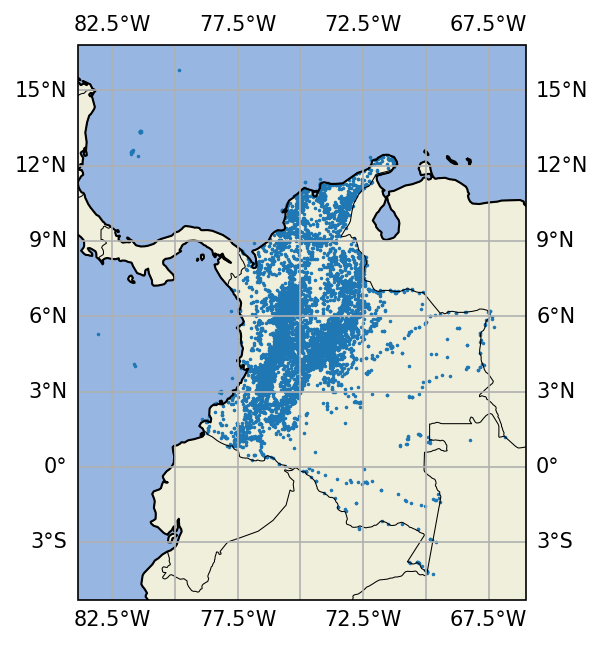

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, dpi=150)
ax.coastlines()
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
ax.scatter(df_cat["longitud"], df_cat["latitud"], transform=ccrs.PlateCarree(), s=0.5)
ax.add_feature(feature.LAND)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE, linewidth=0.5)
ax.add_feature(feature.BORDERS, linewidth=0.5);

### 1.3 🗂️ Visualización por estado de las estaciones

Además de visualizar todas las estaciones en un único mapa, también es útil representar su distribución según el **estado operativo**: si están **activas**, **en mantenimiento** o **suspendidas**.

Esta visualización facilita:

- Evaluar la cobertura real de la red de monitoreo actual (estaciones activas),
- Identificar regiones con estaciones fuera de servicio,
- Priorizar acciones de mantenimiento o rehabilitación.

In [5]:
df_grp = df_cat.groupby("estado")

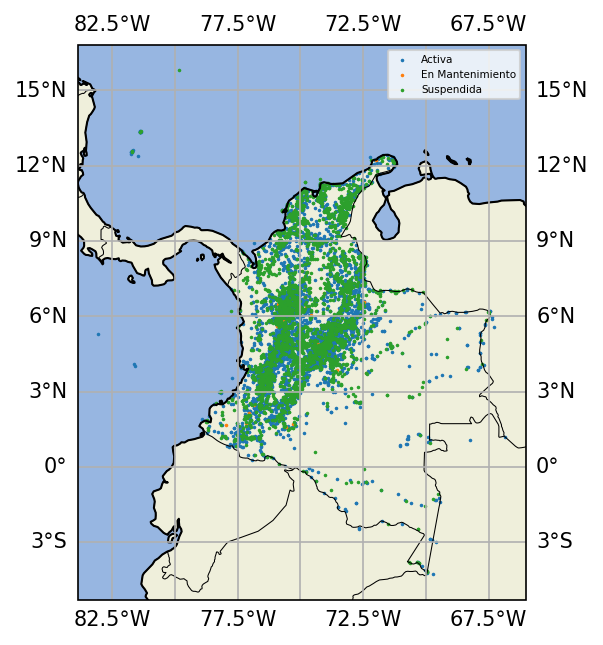

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, dpi=150)

for _, group in df_grp:
    ax.scatter(
        group["longitud"],
        group["latitud"],
        transform=ccrs.PlateCarree(),
        s=0.5,
        label=_,
    )

ax.coastlines()
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
ax.add_feature(feature.LAND)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE, linewidth=0.5)
ax.add_feature(feature.BORDERS, linewidth=0.5)
ax.legend(fontsize=5);

## 2. 🌧️ Consulta de datos históricos desde datosabiertos.gov.co

Una vez conocemos la ubicación y estado de las estaciones hidrometeorológicas, podemos acceder a sus registros históricos —como precipitación, temperatura, humedad, presión, etc.— mediante la plataforma [datosabiertos.gov.co](https://www.datos.gov.co).

Esta plataforma, basada en **Socrata**, ofrece una API pública que permite consultar y filtrar datos por estación, variable, fecha, entre otros criterios.

> 📌 Cada variable disponible tiene un identificador único llamado `dataset_identifier`. Por ejemplo:
>
> - `s54a-sgyg`: Precipitación
> - `sbwg-7ju4`: Temperatura
> - `uext-mhny`: Humedad relativa

En esta sección, aprenderás a:
- Conectarte a la API de datos abiertos,
- Consultar registros históricos de una estación específica,
- Visualizar series temporales de variables como la precipitación y temperatura.

### 2.1 ☔ Consulta de datos de precipitación

Usaremos el identificador `s54a-sgyg`, correspondiente a registros de **precipitación** reportada por estaciones automáticas y convencionales.

Primero, realizamos una consulta general para descargar los primeros 2.000 registros:

In [7]:
# Crear cliente de conexión
client = Socrata("www.datos.gov.co", None)

# Descargar registros de precipitación (máximo 2000)
results = client.get("s54a-sgyg", limit=2000)
df_ppt = pd.DataFrame.from_records(results)
df_ppt.head()

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0035035100,0240,2017-12-10T17:10:00.000,0,ICA VILLAVICENCIO - AUT,META,VILLAVICENCIO,META,4.137388889,-73.625,Precipitacion,mm
1,0026145505,0240,2019-05-02T10:40:00.000,0,LA FLORESTA - AUT,CALDAS,BELALCAZAR,CAUCA,4.979219444,-75.83555556,Precipitacion,mm
2,0021165501,0240,2019-05-13T01:50:00.000,0,DOLORES - AUT,TOLIMA,DOLORES,ALTO MAGDALENA,3.537155556,-74.82982778,Precipitacion,mm
3,3519700092,0240,2019-08-11T01:40:00.000,0,MANI - AUT,CASANARE,MANI,META,4.816419444,-72.30865,Precipitacion,mm
4,0026055501,0240,2017-11-03T11:50:00.000,0,GINEBRA - AUT,VALLE DEL CAUCA,GINEBRA,CAUCA,3.738388889,-76.22083056,Precipitacion,mm


El conjunto de datos incluye campos como:

- `fechaobservacion`: fecha y hora de la medición  
- `valorobservado`: valor de precipitación (en mm)  
- `codigoestacion` y `nombreestacion`  
- `latitud` y `longitud`  
- `departamento`, `municipio`, `zonahidrografica`  

````{admonition} 💡 Conversión de tipos de datos
:class: tip

En algunos casos, es necesario convertir los tipos de datos antes de analizarlos o graficarlos:

- `fechaobservacion` debe transformarse a tipo `datetime`
- `valorobservado` debe convertirse a tipo `float`


### 2.2 🌡️ Serie temporal de temperatura para una estación específica

Ahora consultaremos la serie temporal de **temperatura del aire** registrada por la estación `0021205012`, correspondiente a la **Universidad Nacional - Bogotá**, usando el conjunto de datos identificado como `sbwg-7ju4`.

Al tratarse de una serie histórica extensa, es posible que las solicitudes a la API tarden más de lo normal. Para evitar errores de tipo `Timeout`, recomendamos crear un cliente con un mayor tiempo de espera.

In [8]:
from sodapy import Socrata

# Crear un nuevo cliente con mayor tiempo de espera
client_long = Socrata("www.datos.gov.co", None, timeout=60)

In [9]:
temp_query = client_long.get(
    dataset_identifier="sbwg-7ju4",
    select="fechaobservacion, valorobservado, codigoestacion",
    where="codigoestacion IN ('0021205012') AND fechaobservacion > '2020-01' AND fechaobservacion < '2020-02'",
    limit=1000,
)


# Convertir resultados a DataFrame
df_temp = pd.DataFrame.from_records(temp_query)
df_temp.head()

,fechaobservacion,valorobservado,codigoestacion
0,2020-01-21T09:00:00.000,17.8,0021205012
1,2020-01-21T19:00:00.000,15.2,0021205012
2,2020-01-21T14:00:00.000,16.2,0021205012
3,2020-01-21T16:00:00.000,18.3,0021205012
4,2020-01-21T23:00:00.000,12.7,0021205012


Convertimos los datos a los tipos adecuados antes de graficarlos:

In [10]:
# Conversión de tipos y orden temporal
df_temp["fechaobservacion"] = pd.to_datetime(df_temp["fechaobservacion"])
df_temp["valorobservado"] = df_temp["valorobservado"].astype(float)
df_temp.set_index("fechaobservacion", inplace=True)
df_temp = df_temp.sort_index()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2020-01-01 01:00:00 to 2020-01-31 23:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   valorobservado  743 non-null    float64
 1   codigoestacion  743 non-null    object 
dtypes: float64(1), object(1)
memory usage: 17.4+ KB


Finalmente, graficamos la serie temporal de temperatura:

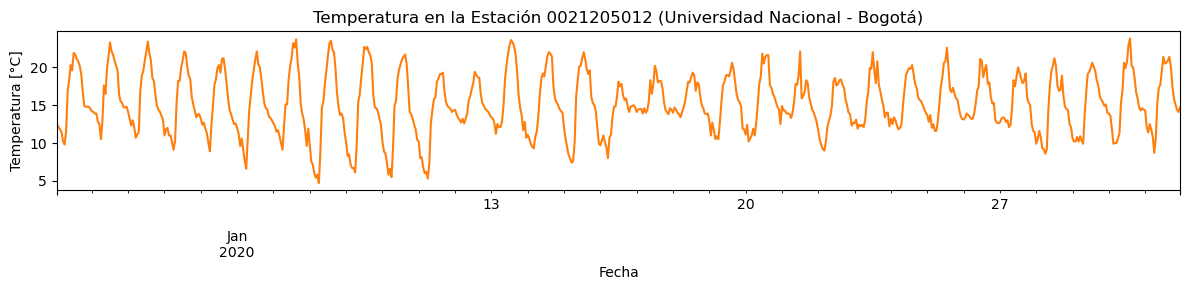

In [11]:

# Graficar serie de temperatura
fig, ax = plt.subplots(figsize=(12, 3))
df_temp["valorobservado"].plot(ax=ax, color="C1")

ax.set_title("Temperatura en la Estación 0021205012 (Universidad Nacional - Bogotá)")
ax.set_ylabel("Temperatura [°C]")
ax.set_xlabel("Fecha")

plt.tight_layout()

```{admonition} ⚠️ Evita consultar rangos de datos muy amplios
:class: warning

La plataforma de datos abiertos **Socrata** impone límites de uso y puede restringir consultas que:

- Acceden a un número muy alto de registros (varios miles).
- Cubren periodos de tiempo muy amplios (años completos o toda la base de datos).
- Se realizan sin autenticación (sin `app_token`).

💡 Para evitar errores como `ReadTimeout`, `ThrottlingError` o consultas vacías, **limita tu consulta a periodos cortos**, por ejemplo un mes a la vez:

```python
where="codigoestacion IN ('0021205012') AND fechaobservacion > '2020-01' AND fechaobservacion < '2020-02'"


```{hint}
📘 **Tip**: Para obtener más información sobre los parámetros que acepta la función `get()`, puedes ejecutar:

```python
client.get?

## 3. ⏱️ Datos en tiempo "Causi-real" de IDEAM

Además del acceso a información histórica, el IDEAM publica un conjunto de datos adicional que contiene observaciones en **tiempo cercano a la medición** (también llamado *cuasi-real*). Este conjunto está disponible en [datosabiertos.gov.co](https://www.datos.gov.co/es/Ambiente-y-Desarrollo-Sostenible/Datos-de-Estaciones-de-IDEAM-y-de-Terceros/57sv-p2fu) y corresponde al siguiente identificador:
```python
dataset_identifier = "57sv-p2fu"


📡 Este conjunto de datos permite acceder a las lecturas más recientes reportadas por estaciones automáticas del IDEAM y de terceros, incluyendo variables como temperatura, precipitación, viento y presión, entre otros.

🚨 A diferencia de los datasets históricos como `s54a-sgyg` (precipitación) o `sbwg-7ju4` (temperatura), este recurso:

- Está diseñado para monitoreo **en línea** o con muy poco retardo.
- Puede contener observaciones con menor validación o control de calidad.
- Agrupa datos de sensores diversos en una sola tabla.
- Incluye estaciones del IDEAM **y también estaciones de terceros**.

A continuación, realizamos una consulta básica para ver qué columnas contiene esta tabla, filtrando las observaciones de los últimos 5 días:


In [12]:
from datetime import datetime, timedelta
from pandas import to_datetime

# Establecer rango de fechas recientes
fecha_inicio = datetime.now() - timedelta(days=5)
fecha_inicio_str = f"{to_datetime(fecha_inicio):%Y-%m-%d}"

# Consulta al dataset cuasi-real
nrt_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="*",
    where=f"fechaobservacion >= '{fecha_inicio_str}'",
    limit=1000
)

# Convertir a DataFrame
df_nrt = pd.DataFrame.from_records(nrt_query)
df_nrt.head()

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida,entidad
0,2401500080,0240,2025-06-20T17:00:00.000,0,PANELAS,BOYACÁ,MOTAVITA,SOGAMOSO,5.634380556,-73.386469444,PRECIPITACIÓN,mm,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,2401500080,0104,2025-06-20T17:00:00.000,53,PANELAS,BOYACÁ,MOTAVITA,SOGAMOSO,5.634380556,-73.386469444,DIRECCIÓN DEL VIENTO,GN,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,2401500080,0103,2025-06-20T17:00:00.000,8.1,PANELAS,BOYACÁ,MOTAVITA,SOGAMOSO,5.634380556,-73.386469444,VELOCIDAD DEL VIENTO,m/s,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
3,2401500080,0070,2025-06-20T17:00:00.000,11.2,PANELAS,BOYACÁ,MOTAVITA,SOGAMOSO,5.634380556,-73.386469444,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
4,2401500080,0255,2025-06-20T17:00:00.000,695.6,PANELAS,BOYACÁ,MOTAVITA,SOGAMOSO,5.634380556,-73.386469444,PRESIÓN ATMOSFÉRICA,hPa,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


🔎 Este conjunto de datos es ideal para desarrollar sistemas de monitoreo operativo, alertas tempranas, o visualizar fenómenos meteorológicos recientes. Sin embargo, no es recomendable usarlo directamente para análisis climatológicos de largo plazo debido a su naturaleza preliminar.

En la siguiente subsección exploraremos cómo filtrar los datos por estación y sensor, y generar una serie temporal.

### 3.1 📈 Serie temporal cuasi-real por estación y sensor

Podemos consultar datos cuasi-reales de una estación específica utilizando su `codigoestacion` y el `codigosensor` correspondiente a la variable de interés. Por ejemplo, el sensor `0071` reporta **temperatura del aire**.

A continuación, filtramos los datos recientes de la estación **Aeropuerto Alberto Lleras Camargo (Sogamoso)** con código `0024035340`

In [13]:
# Parámetros de consulta
cod_est = "0024035340"  # Aeropuerto de Sogamoso
cod_sensor = "0071"     # Sensor de temperatura

# Consulta de temperatura en tiempo cuasi-real
aero_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="fechaobservacion, valorobservado",
    where=f"fechaobservacion >= '{fecha_inicio_str}' \
            AND codigoestacion IN ('{cod_est}') \
            AND codigosensor IN ('{cod_sensor}')",
    limit=2000
)

# Convertir a DataFrame
df_aero = pd.DataFrame.from_records(aero_query)
df_aero["fechaobservacion"] = pd.to_datetime(df_aero["fechaobservacion"])
df_aero["valorobservado"] = df_aero["valorobservado"].astype(float)
df_aero = df_aero.set_index("fechaobservacion").sort_index()

In [14]:
df_aero

,valorobservado
fechaobservacion,
2025-06-22 03:02:00,13.6
2025-06-22 03:04:00,13.6
2025-06-22 03:06:00,13.5
2025-06-22 03:08:00,13.6
2025-06-22 03:10:00,13.6
...,...
2025-06-23 16:22:00,20.9
2025-06-23 16:24:00,20.8
2025-06-23 16:26:00,21.2


Ahora generemos un gráfico rápido de la serie de temperatura para las últimas 24 horas

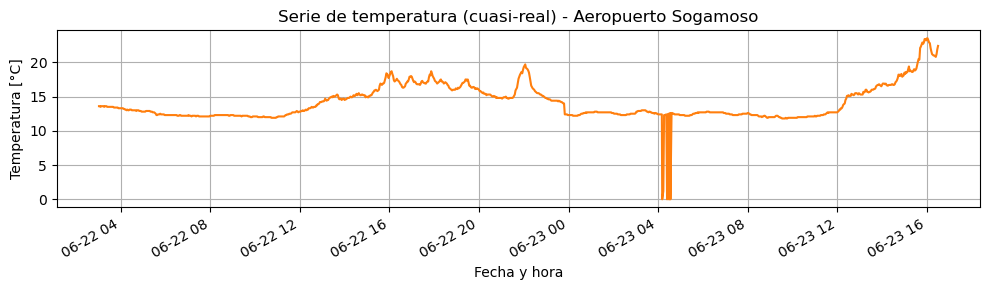

In [15]:
# Visualización de la serie temporal
fig, ax = plt.subplots(figsize=(10, 3))
df_aero["valorobservado"].plot(ax=ax, color="C1")

ax.set_title("Serie de temperatura (cuasi-real) - Aeropuerto Sogamoso")
ax.set_ylabel("Temperatura [°C]")
ax.set_xlabel("Fecha y hora")
ax.grid(True)
plt.tight_layout()

### 3.2 📊 Múltiples estaciones, un mismo sensor

También es posible consultar simultáneamente varias estaciones que reportan una misma variable —por ejemplo, **temperatura del aire**— filtrando por su `codigoestacion` y el mismo `codigosensor`.

A continuación, consultamos datos recientes del sensor de temperatura (`codigosensor = "0071"`) para tres estaciones:

- **Aeropuerto de Sogamoso** (`0024035340`)
- **Universidad Nacional - Bogotá** (`0021205012`

In [16]:
# Estaciones a consultar
estaciones = {
    "0024035340": "Sogamoso - Aeropuerto",
    "0021205012": "Bogotá - UNAL"
}
sensor_temp = "0071"
estaciones_str = ", ".join([f"'{e}'" for e in estaciones.keys()])

# Consulta
multi_query = client.get(
    dataset_identifier="57sv-p2fu",
    select="fechaobservacion, valorobservado, codigoestacion",
    where=f"fechaobservacion >= '{fecha_inicio_str}' \
            AND codigosensor IN ('{sensor_temp}') \
            AND codigoestacion IN ({estaciones_str})",
    limit=3000
)

# Procesamiento
df_multi = pd.DataFrame.from_records(multi_query)
df_multi["fechaobservacion"] = pd.to_datetime(df_multi["fechaobservacion"])
df_multi["valorobservado"] = df_multi["valorobservado"].astype(float)
df_multi = df_multi.sort_values("fechaobservacion")

Antes de graficar los resultados, es importante asegurarnos de que los datos han sido correctamente transformados:

- La columna `fechaobservacion` debe convertirse a `datetime`.
- El campo `valorobservado` debe convertirse a `float`.
- Ordenamos los datos por fecha para asegurar una visualización coherente.

A continuación, graficamos la **serie temporal de temperatura** para cada estación, usando un color diferente por cada una.


⚠️ No hay datos recientes para la estación: Bogotá - UNAL


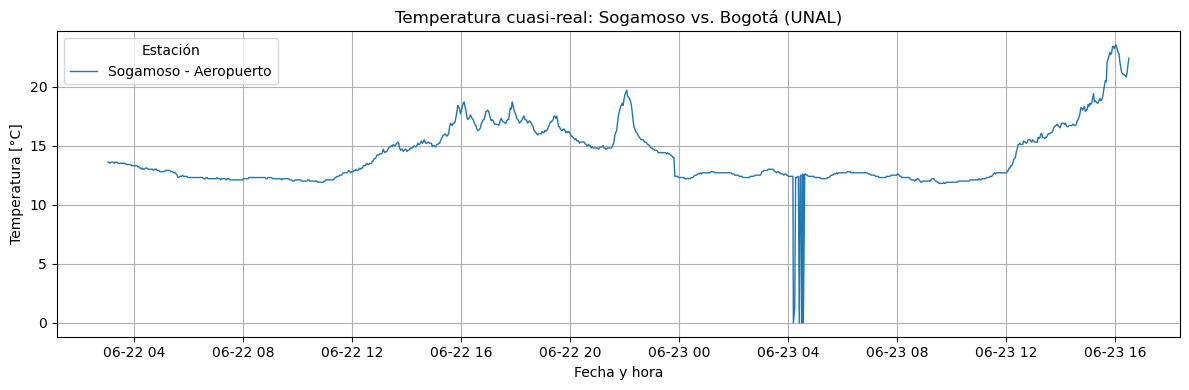

In [17]:
# Gráfico
fig, ax = plt.subplots(figsize=(12, 4))

for codigo, nombre in estaciones.items():
    df_plot = df_multi[df_multi["codigoestacion"] == codigo]
    if not df_plot.empty:
        ax.plot(
            df_plot["fechaobservacion"],
            df_plot["valorobservado"],
            label=nombre,
            lw=1
        )
    else:
        print(f"⚠️ No hay datos recientes para la estación: {nombre}")

ax.set_title("Temperatura cuasi-real: Sogamoso vs. Bogotá (UNAL)")
ax.set_ylabel("Temperatura [°C]")
ax.set_xlabel("Fecha y hora")
ax.legend(title="Estación")
ax.grid(True)
plt.tight_layout()

📌 Esta estrategia es útil para comparar condiciones meteorológicas en diferentes regiones del país en tiempo cuasi-real. Puedes usar esta técnica para otras variables como **precipitación**, **humedad** o **viento**, cambiando el `codigosensor`.

🔍 Si no conoces el código de sensor para una variable específica, puedes consultar los datos sin filtrar por `codigosensor` y luego explorar los valores únicos con:

```python
df_nrt["codigosensor"].unique()

---

## ✅ Conclusiones

En este cuadernillo exploramos distintas formas de acceder, consultar y visualizar información de la red de estaciones hidrometeorológicas del IDEAM utilizando Python. A lo largo de las secciones desarrollamos herramientas para:

- 📥 Consultar el **catálogo nacional de estaciones** con ubicación, categoría, estado operativo y entidad responsable.
- 🗺️ Visualizar las estaciones sobre mapas estáticos e interactivos para una mejor comprensión espacial de la red de monitoreo.
- 📊 Acceder a datos históricos a través de la plataforma [datosabiertos.gov.co](https://www.datos.gov.co), utilizando la API de Socrata y la librería `sodapy`.
- 🌦️ Filtrar, consultar y graficar variables específicas como **precipitación** y **temperatura** para estaciones individuales o múltiples.
- ⏱️ Consultar y graficar datos en **tiempo cuasi-real**, disponibles en una tabla distinta a los datos históricos.

Este enfoque permite a investigadores, profesionales y estudiantes acceder de forma programática a datos públicos hidrometeorológicos de alta resolución temporal y espacial, facilitando así el desarrollo de análisis, visualizaciones y modelos.

```{hint}
💡 Las herramientas y conceptos presentados en este cuaderno son fácilmente adaptables a otras variables, sensores, periodos de tiempo o estaciones, lo que permite construir soluciones personalizadas para distintos contextos y necesidades.


⚠️ Recuerda limitar el tamaño de las consultas realizadas a Socrata para evitar errores por **tiempos de espera** o **restricciones de uso** del API.


## 📚 Recursos y referencias
* Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). *Pythia Foundations* (Version v2023.05.01). [https://doi.org/10.5281/zenodo.7884572](https://doi.org/10.5281/zenodo.7884572)

* Portal de datos abiertos de Colombia – IDEAM:  
  [https://www.datos.gov.co](https://www.datos.gov.co)

* Documentación de Socrata Open Data API (SODA):  
  [https://dev.socrata.com/](https://dev.socrata.com/)

* Repositorio de datos hidrometeorológicos crudos – IDEAM:  
  [https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Datos-Hidrometeorol-gicos-Crudos-Red-de-Estaciones/sbwg-7ju4](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Datos-Hidrometeorol-gicos-Crudos-Red-de-Estaciones/sbwg-7ju4)

* Cuaderno basado en la infraestructura educativa abierta del proyecto [Project Pythia](https://projectpythia.org/)
